# The Fall
Implementation of elevator trough the Earth

## Analytic solution

Is based on equations:

$r=g\frac{t^2}{2}$

for $r=6378km$ the time is:

$t=\sqrt{\frac{2r}{g}}=\sqrt{\frac{2\cdot6378000}{9.81}}\approx19min$


In [1]:
from numpy import sqrt
t=sqrt(2*6378000 / 9.81)
print('Travel time to the center of the Earth is %5.2f seconds. Which is %5.2f minutes' % (t, t/60.) )
print('Total travel time is %5.3f minutes' % (2*t/60.))

Travel time to the center of the Earth is 1140.31 seconds. Which is 19.01 minutes
Total travel time is 38.010 minutes


## Numeric solution

In [2]:
import numpy as np
import pylab as plt
from sys import exit

G = 6.67e-11        ### gravitacni konstatnta
M = 5.972e24        ### hmotnost Zeme
m2 = 1              ### hmotnost telesa
R = 6378000         ### polomer Zeme

NN = 30
D = 1

print('Force on the ground', G * M * m2 / R**2)

fall_x = 0 
fall_y = R
print('Starting point', fall_x, fall_y)

Force on the ground 9.792117207541878
Starting point 0 6378000


## Approximation of Earth mass by disrete set of points

Number of points 592
Calculated Mass 5.972e+24
Element mass 1.0087837837837839e+22


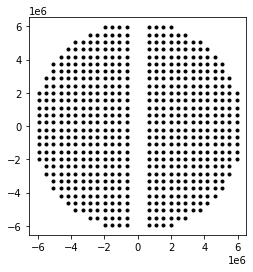

In [3]:
x, y = [], []
for i in np.linspace(-R/D, R/D, NN):
    for j in np.linspace(-R/D, R/D, NN):
        if np.sqrt(i**2 + j**2) < R and (i > (R/10 + fall_x) or i < (-R/10 + fall_x)) :
            x.append(i)
            y.append(j)


x = np.matrix(x)
y = np.matrix(y)

N = np.size(x)
print('Number of points', N)

m1 = np.ones([1,N]) * M / N         ### all points represents mass of the Earth
print('Calculated Mass', np.sum(m1))
print('Element mass', m1[0,0])
plt.plot(x, y, 'k.')
plt.axis('square')
plt.show()

## Force calculation by gravitational force $F=\frac{G.m_1.m_2}{r^2}$ to compare with standard model in Earth potential field $F=ma$

In [4]:
forces = G * m1 * m2 / (np.power(fall_x - x, 2) + np.power(fall_y - y, 2))
forces_projection = np.multiply(forces, np.cos(np.arctan2((x - fall_x), (y - fall_y))))
applied_force = np.sum(forces_projection)
print('Applied Force', applied_force)

Applied Force -14.054753990467816


## Simulation of given time steps by Euler integration
Acceleration

$\ddot{x}_{t+1} = \frac{F}{m}$

Velocity

$\dot{x}_{t+1} = \dot{x_t} + \ddot{x}_{t+1}dt$

Position

$x_{t+1} = x_t + \dot{x}_{t+1}dt$

In [5]:
dt = 1
q = fall_y   # x
q_dot = 0    # v
q_2dot = 0   # a
t, a, v, s, f = [], [], [], [], []

for i in range(3000):
    forces = G * m1 * m2 / (np.power(fall_x - x, 2) + np.power(fall_y - y, 2))
    forces_projection = np.multiply(forces, np.cos(np.arctan2((x - fall_x), (y - fall_y))))
    applied_force = np.sum(forces_projection)
    # Euler integration
    q_2dot = (applied_force / m2) # Acceleration
    q_dot = q_dot + q_2dot * dt   # Velocity
    q = q + q_dot * dt            # Position
    #
    fall_y = q
    # Store results
    a.append(q_2dot)
    v.append(q_dot)
    s.append(q)
    t.append(dt*i)
    f.append(applied_force)    
print('Calculation done!')

Calculation done!


## Show position of the elevator relative to the Earth after the simulation

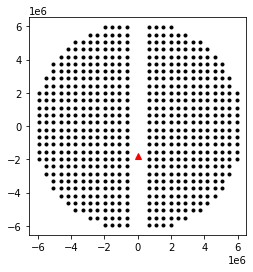

In [6]:
plt.plot(x, y, 'k.')
plt.plot(fall_x, fall_y, 'r^')
plt.axis('square')
plt.show()

## Show position during the _fall_

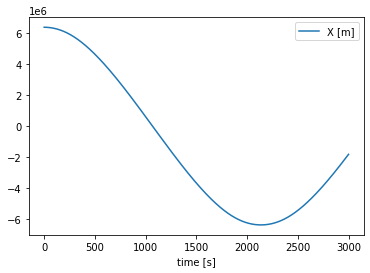

In [7]:
plt.plot(t, s)
plt.xlabel('time [s]')
plt.legend(['X [m]'])
plt.show()

## Show velocity during the _fall_

Max reached velocity is 8956.44 m/s.


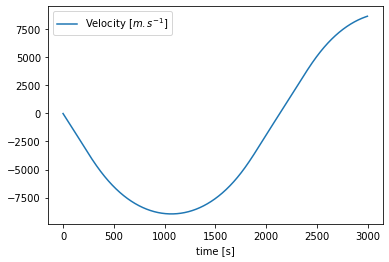

In [8]:
print('Max reached velocity is %5.2f m/s.' %abs(min(v)))
plt.plot(t, v)
plt.xlabel('time [s]')
plt.legend([r'Velocity $[m.s^{-1}]$'])
plt.show()

## Show Force and Acceleration during the _fall_

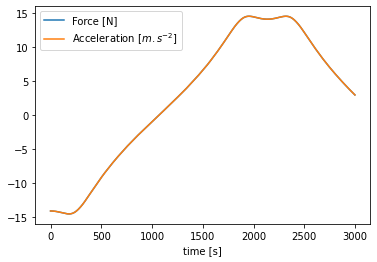

In [9]:
plt.plot(t, f)
plt.plot(t, a)
plt.xlabel('time [s]')
plt.legend(['Force [N]', r'Acceleration $[m.s^{-2}]$'])
plt.show()